In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
train_path = r"C:\Users\user\Documents\ML\datasets\MNIST\train.csv"
data = pd.read_csv(train_path)

In [3]:
test_path = r"C:\Users\user\Documents\ML\datasets\MNIST\test.csv"
test_data = pd.read_csv(test_path)

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# we will split the labels from the image data and store it in labels and pixel values variables
labels = data['label'] # 1d array of size 42000
pixels = data.drop('label', axis=1) # 2d array of 42000 images and each having 784 pixels

In [6]:
## lets store the pixel values denoted by many columns as matrix data, so one 2d matrix represents one image
images = pixels.to_numpy().reshape(-1, 28, 28) # 3d matrix of with 42000 images with each being being of shape 28*28

We are doing this step so that it becomes easier to propogate through the implementation of various feature extraction technique that will be explored later on in this notebook

Text(0.5, 1.0, 'Label: 9')

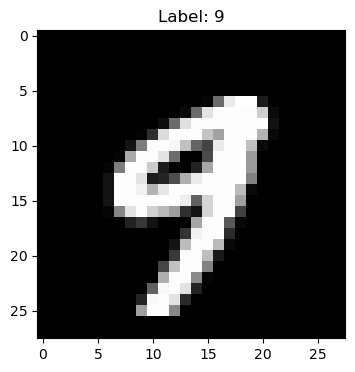

In [7]:
## lets see an example image
plt.figure(figsize=(4,4))
idx = 323

# images are stored in the "images" variable and each index of "images" denotes one image 
plt.imshow(images[idx], cmap='gray')
plt.title('Label: ' + str(labels[idx]))

In [8]:
data['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

The data is split fairly evenly so we wouldnt need to focus on sampling techniques

In [9]:
x_train, x_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state = 42)

In [10]:
svm_classifier = SVC(random_state=42)
param_grid = {
    'C': [0.1],
    'kernel': [ 'poly'],
    'gamma': ['auto']
}

grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search_svm.fit(x_train, y_train)

best_params = grid_search_svm.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
model_svm = grid_search_svm.best_estimator_

# Make predictions
y_pred_svm = model_svm.predict(x_test)

# Check accuracy of model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Classification Report:\n{classification_rep_svm}")

Best Hyperparameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Accuracy: 0.9728571428571429
Confusion Matrix:
[[810   0   1   0   1   0   3   0   1   0]
 [  0 904   2   0   1   0   1   1   0   0]
 [  3   9 815   2   4   3   4   2   4   0]
 [  3   3   5 898   0   9   0   4   9   6]
 [  2   0   2   0 820   1   4   1   0   9]
 [  0   1   1  12   3 670   9   0   4   2]
 [  4   1   3   0   1   3 771   0   2   0]
 [  0   2   4   0   3   0   0 878   1   5]
 [  0   6   3   6   6   5   0   1 803   5]
 [  2   2   1   7   6   6   0   8   3 803]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       816
           1       0.97      0.99      0.98       909
           2       0.97      0.96      0.97       846
           3       0.97      0.96      0.96       937
           4       0.97      0.98      0.97       839
           5       0.96      0.95      0.96       702
           6       0.97      0.98      0.98       78

In [ ]:
x_test.shape,y_test.shape

In [ ]:
errors

In [ ]:
x_test

In [ ]:
errors = np.where(y_pred_svm != y_test)[0]

# Display misclassified images
misclassified_images = x_test_images[errors]
misclassified_labels = y_test[errors]
predicted_labels = y_pred_svm[errors]